In [1]:
%matplotlib inline


# Rainfall-runoff dataset of Laos


In [2]:
# sphinx_gallery_thumbnail_number = -1

import site
site.addsitedir('../../..')

from easy_mpl import pie
from ai4water.eda import EDA
from water_datasets import MtropicsLaos, ecoli_mekong
from water_datasets.utils import print_info

print_info()


**********Tensorflow models could not be imported **********

numpy 1.26.4
pandas 2.1.4
water_datasets 0.1.0
python 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
os posix
matplotlib 3.8.4
xarray 2024.7.0
netCDF4 1.6.2
Script Executed on:  06 August 2024 09:35:03
tot_cpus 112
avail_cpus 112
mem_gib 251.52819442749023


/home/abbaa0a/anaconda3/envs/watds_py312/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
laos = MtropicsLaos(path="/mnt/datawaha/hyex/atr/data")


        Not downloading the data since the directory 
        /mnt/datawaha/hyex/atr/data/MtropicsLaos already exists.
        Use overwrite=True to remove previously saved files and download again


/home/abbaa0a/water-datasets/water_datasets/mtropics.py:958: UserWarning: preprocessing of shapefiles can not be done because no fiona installation is found.
  warnings.warn("preprocessing of shapefiles can not be done because no fiona installation is found.")


## precipitation



In [4]:
pcp = laos.fetch_pcp()
print(pcp.shape)
#

(1665361, 1)


## weather station



In [5]:
w = laos.fetch_weather_station_data()
print(w.shape)

(166536, 4)


In [6]:
wl, spm = laos.fetch_hydro()
print(wl.shape)

(454692, 1)


In [7]:
print(spm.shape)

(6428, 1)


In [8]:
ecoli = laos.fetch_ecoli()
print(ecoli.shape)

(409, 1)


In [9]:
print(ecoli.head())

                     Ecoli_mpn100
Date_Time                        
2011-05-25 10:00:00           NaN
2011-05-25 16:40:00        1100.0
2011-05-25 17:06:00        1400.0
2011-05-25 17:10:00           NaN
2011-05-25 17:24:00       14000.0


In [10]:
print(ecoli.tail())

# # %%
ecoli_all = laos.fetch_ecoli(features='all')
print(ecoli_all.shape)

                     Ecoli_mpn100
Date_Time                        
2021-02-25 14:10:00         250.0
2021-03-07 14:10:00         200.0
2021-03-17 15:11:00         290.0
2021-03-27 15:22:00         720.0
2021-04-06 15:05:00         560.0
(409, 3)


In [11]:
ecoli_all.head()

,Ecoli_LL_mpn100,Ecoli_mpn100,Ecoli_UL_mpn100
Date_Time,,,
2011-05-25 10:00:00,NaN,NaN,NaN
2011-05-25 16:40:00,715.0,1100.0,1550.0
2011-05-25 17:06:00,1000.0,1400.0,1900.0
2011-05-25 17:10:00,NaN,NaN,NaN
2011-05-25 17:24:00,9000.0,14000.0,22000.0


In [12]:
phy_chem = laos.fetch_physiochem('T_deg')
print(phy_chem.shape)

(411, 1)


## pysiochemical attributes



In [13]:
phy_chem_all = laos.fetch_physiochem(features='all')
print(phy_chem_all.shape)

(411, 8)


## rain gauages



In [14]:
rg = laos.fetch_rain_gauges()
print(rg.shape)

(6939, 7)


## regression



In [15]:
df = laos.make_regression()
print(df.shape)

(650741, 9)


In [16]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,2.868160e+15,NaN


In [17]:
df = laos.make_regression(lookback_steps=30)
print(df.shape)

(5948, 9)


In [18]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,2.868160e+15,NaN


In [19]:
print(df.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source       0
Ecoli_mpn100    5690
dtype: int64


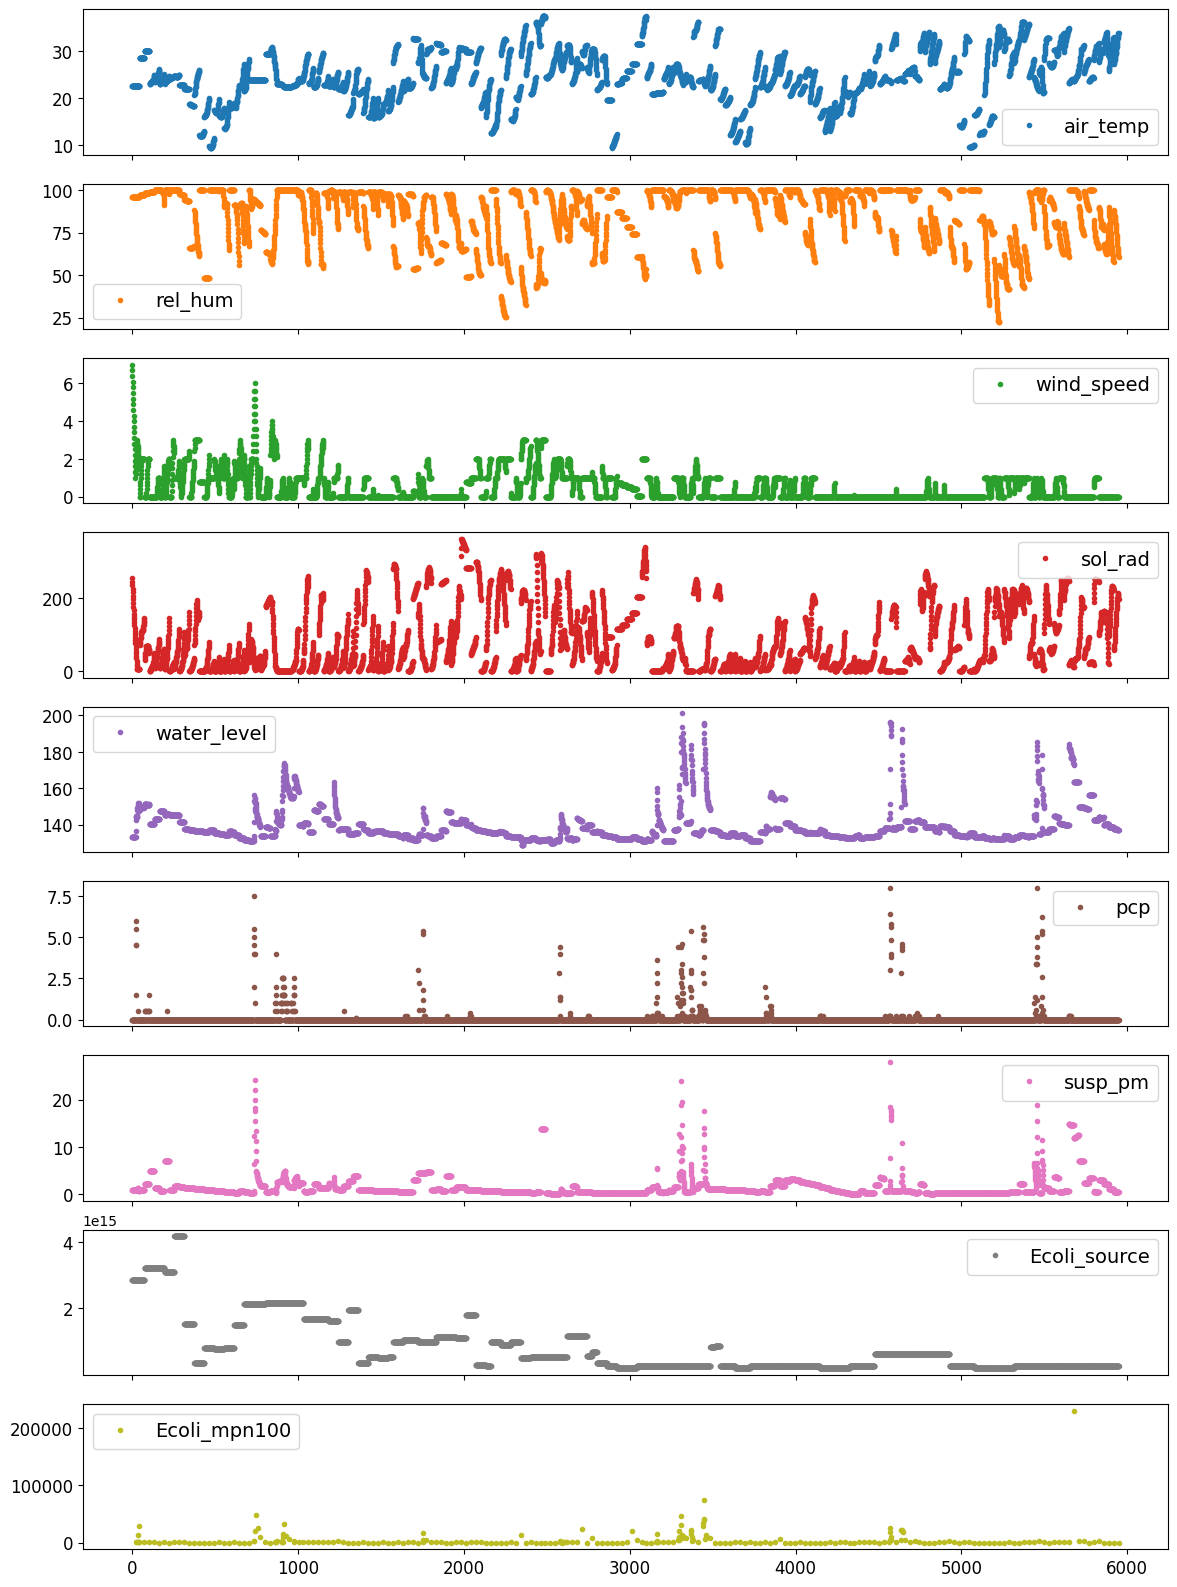

In [20]:
eda = EDA(data=df)
eda.plot_data(subplots=True, figsize=(14, 20),
              ignore_datetime_index=True)

## classification



In [21]:
df = laos.make_classification(lookback_steps=30)
print(df.shape)

(5948, 9)


In [22]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,2.868160e+15,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,2.868160e+15,NaN


In [23]:
print(df.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source       0
Ecoli_mpn100    5690
dtype: int64


## ecoli_mekong



In [24]:
ecoli = ecoli_mekong()
print(ecoli.shape)

(1602, 10)


In [25]:
print(ecoli.head())

                    station_name      T     EC  DOpercent    DO    pH   ORP  \
Date_Time                                                                     
2011-05-25 10:00:00   Houay Pano  24.11  273.0       87.5  7.34  7.67  53.5   
2011-05-25 16:40:00   Houay Pano    NaN    NaN        NaN   NaN   NaN   NaN   
2011-05-25 17:06:00   Houay Pano    NaN    NaN        NaN   NaN   NaN   NaN   
2011-05-25 17:10:00   Houay Pano    NaN    NaN        NaN   NaN   NaN   NaN   
2011-05-25 17:24:00   Houay Pano    NaN    NaN        NaN   NaN   NaN   NaN   

                     Turbidity       TSS  E-coli_4dilutions  
Date_Time                                                    
2011-05-25 10:00:00      13.47       NaN                NaN  
2011-05-25 16:40:00    1380.00  0.899281             1100.0  
2011-05-25 17:06:00    1116.00  0.993190             1400.0  
2011-05-25 17:10:00    1392.00  1.107880                NaN  
2011-05-25 17:24:00     702.00  1.325030            14000.0  


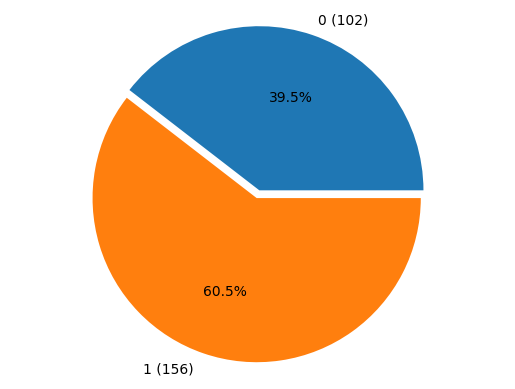

In [26]:
_ = pie(df.dropna().iloc[:, -1].values.astype(int), explode=(0, 0.05))